# K Nearest Neighbor Classification on USPS Data set for recognising hand written numbers

Name: Abhishek Patel 
Student ID: 100 203 3618
Team: 16

Note: Total runtime for all the code blocks can go upto 2.6 mins. avg runtime is 2.54 mins.

Time Data recorded on Kaggle.com with latest environmnet and No persistence Disk

**Imports**


In [1]:
## imports required for the project
import h5py
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.model_selection import cross_val_score

from skimage.feature import hog, daisy

import cv2
import time


In [2]:
start_time = time.time()

**Data Location**

In [3]:
## data location 
directory = "/kaggle/input/usps-dataset/"
filename = "usps.h5"

**Reading Data From file**

In [4]:
## reading the data from the file 
with h5py.File(directory + filename, 'r') as hf:
    train = hf.get('train')
    x_train = train.get('data')[:]
    y_train = train.get('target')[:]
    test = hf.get('test')
    x_test = test.get('data')[:]
    y_test = test.get('target')[:]
labels = list(set(y_train))

**Function to find the best k for knn**

In [5]:
def KNN_optimal_K(x_train,y_train,x_test,y_test,iterations,metric):
    K_scores = []
    k= 2
    while(k<=iterations):
        knn = KNeighborsClassifier(n_neighbors = k,metric= metric)
        scores = cross_val_score(knn,x_train,y_train,cv=10, scoring = 'accuracy')
        K_scores.append(scores.mean())
        k+=1 
    plt.figure(figsize=(12, 6))
    plt.plot(range(2,iterations+1), K_scores)
    plt.xlabel('K Value')
    plt.ylabel('Accuracy')
    return K_scores

**Knn Implementation**

In [6]:
def knn(x_train,y_train,x_test,y_test,iterations,metric='euclidean'):
    K_scores = KNN_optimal_K(x_train,y_train,x_test,y_test,iterations,metric)
    chosen_k = 2+K_scores.index(max(K_scores))
    print(f"The best k is {chosen_k}")
    knn = KNeighborsClassifier(n_neighbors=chosen_k,metric= metric)
    knn.fit(x_train, y_train)
    scores = cross_val_score(knn,x_train,y_train,cv=10, scoring = 'accuracy')
    print(f"Cross Validation Results: {scores}")
    y_prediction = knn.predict(x_test)
    accuracy = accuracy_score(y_test, y_prediction)
    cm = confusion_matrix(y_test, y_prediction, labels=labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)
    disp.plot()
    plt.show()
    print(f"Accuracy of the model is: {accuracy}")
    prf = precision_recall_fscore_support(y_test, y_prediction, average='macro')
    print(f"Precision: {prf[0]} \nRecall: {prf[1]} \nf1 score: {prf[2]}")
    return knn

**main function**

The best k is 3
Cross Validation Results: [0.96849315 0.97668038 0.97119342 0.95610425 0.96844993 0.96433471
 0.97256516 0.93964335 0.97805213 0.97119342]


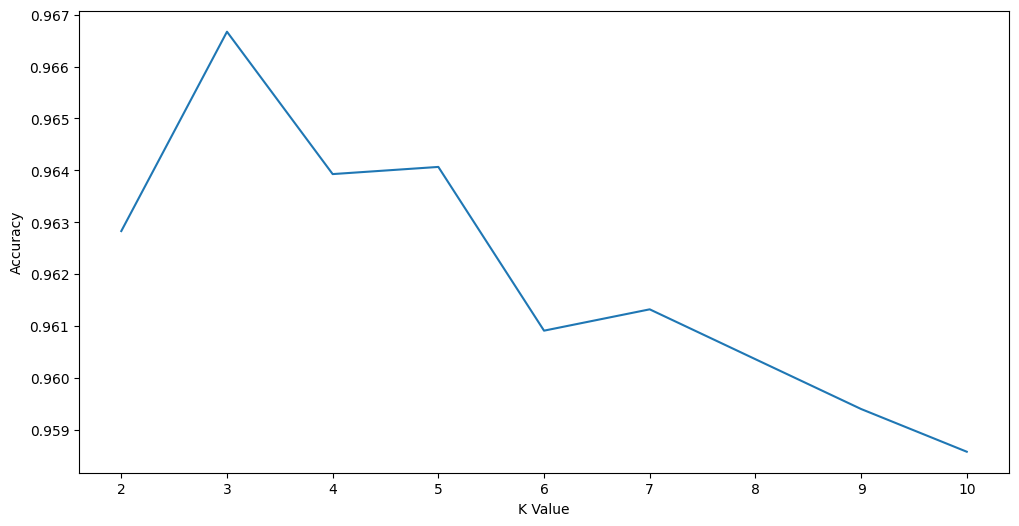

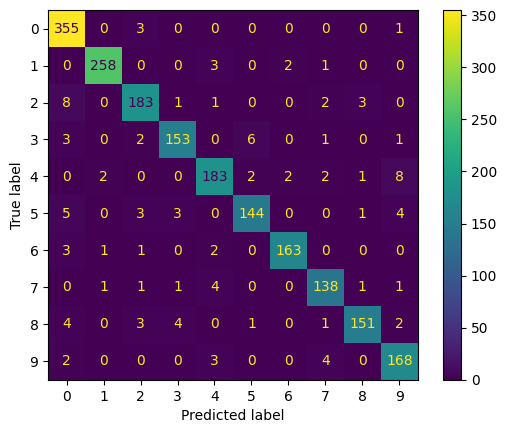

Accuracy of the model is: 0.9446935724962631
Precision: 0.9444025152985926 
Recall: 0.938344997342736 
f1 score: 0.9410930231712381


In [7]:
model1 = knn(x_train,y_train,x_test,y_test,10)

# Extra Credit

**function to show image**

In [8]:
## function to show image and it corresponding label
def show_img_with_value(img,value):
    plt.figure(figsize=(4,4))
    plt.imshow(img,cmap='gray')
    plt.show()
    print(value)

**function to convert 1D array to image**

In [9]:
## converting the 1d array to image 
def convert_1d_to_img(images):
    image_list = []
    for _ in images:
        img = np.reshape(_,(16, 16))
        image8bit = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')
        blurred_img = cv2.GaussianBlur(image8bit, (3, 3), 0)
        enhanced_img = cv2.equalizeHist(blurred_img)
        image_list.append(enhanced_img)
    return image_list


**Function to extract HOG features**

In [10]:
def feature_extractor(images):
    fd_hog = []
    hog_images = []
    fd_daisy = []
    daisy_images = []
    for image in images:
        fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),
                            cells_per_block=(1, 1), visualize=True)
        fd_hog.append(fd)
        hog_images.append(hog_image.flatten())
        
        descs, descs_img = daisy(image, step=10, radius=4, rings=2, histograms=3,
                         orientations=8, visualize=True)
        
        fd_daisy.append(descs.flatten())
        daisy_images.append(descs_img.flatten())
    return np.concatenate((fd_hog, hog_images), axis=1),np.concatenate((fd_daisy, daisy_images), axis=1)
    


**Main function**

The best k is 3
Cross Validation Results: [0.96164384 0.96707819 0.96159122 0.95198903 0.96296296 0.96844993
 0.97256516 0.9478738  0.97668038 0.95747599]


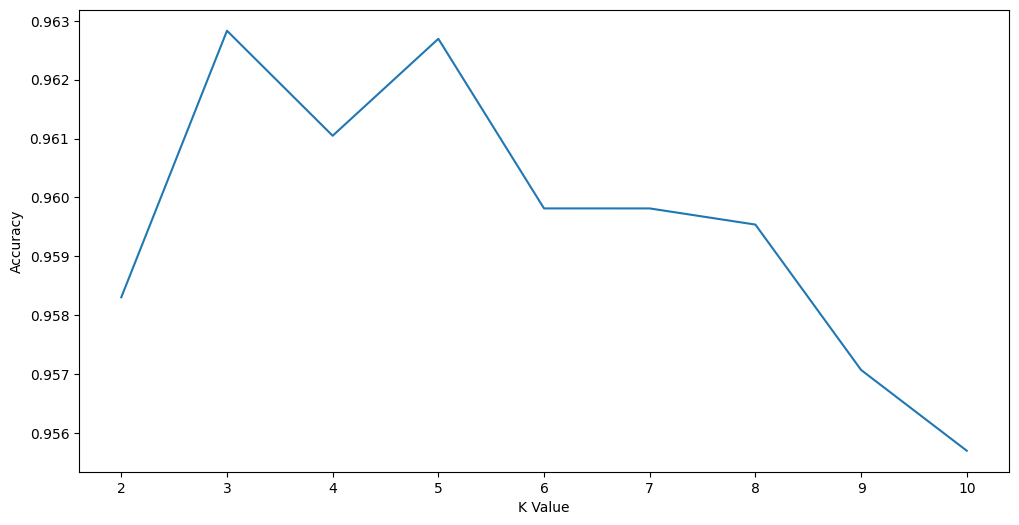

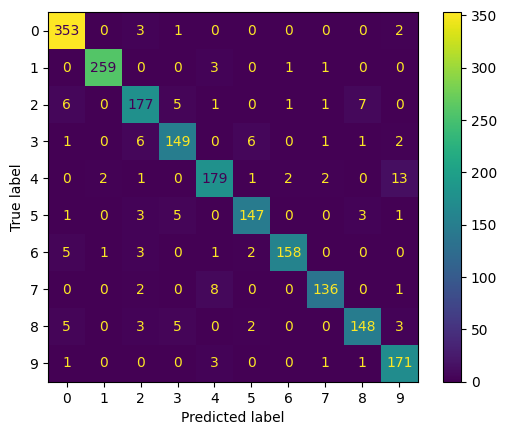

Accuracy of the model is: 0.935226706527155
Precision: 0.9326837994800113 
Recall: 0.9281877062232367 
f1 score: 0.930097355662731


In [11]:
image_list_traning = convert_1d_to_img(x_train)
image_list_testing = convert_1d_to_img(x_test)
hog_results, daisy_results = feature_extractor(image_list_traning)
hog_results_test, daisy_results_test = feature_extractor(image_list_testing)



new_x_train = np.concatenate((x_train,hog_results),axis =1)
new_x_test = np.concatenate((x_test,hog_results_test),axis =1)
scaler = StandardScaler()
new_x_train_scaled_hog = scaler.fit_transform(new_x_train)
new_x_test_scaled_hog = scaler.transform(new_x_test)

model2 = knn(new_x_train_scaled_hog,y_train,new_x_test_scaled_hog,y_test,10)

The best k is 5
Cross Validation Results: [0.97123288 0.96707819 0.96570645 0.95747599 0.96296296 0.97119342
 0.98216735 0.95061728 0.97668038 0.96844993]


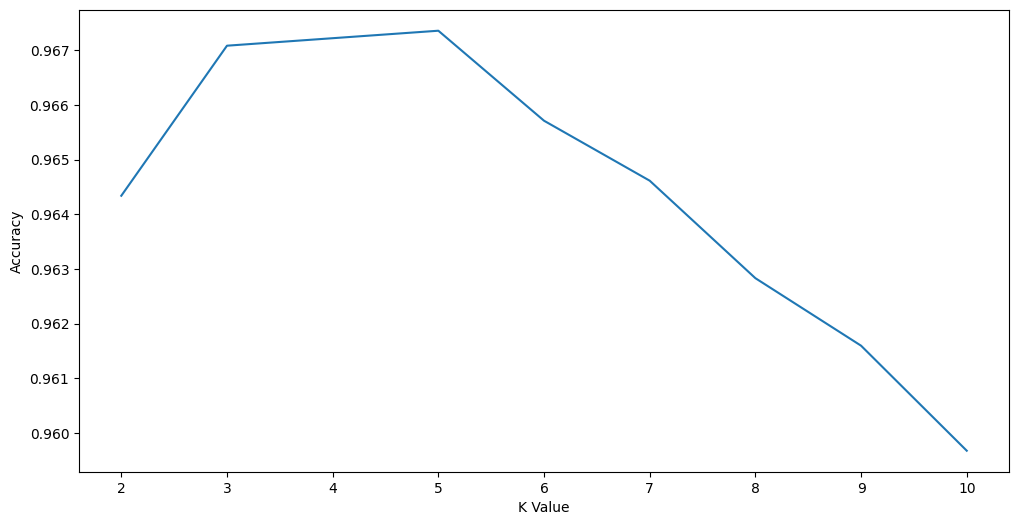

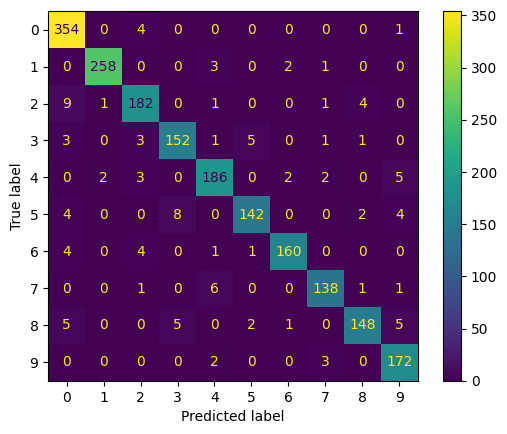

Accuracy of the model is: 0.942700548081714
Precision: 0.9422793357227762 
Recall: 0.9358969378747322 
f1 score: 0.938720757356513


In [12]:
new_x_train = np.concatenate((x_train,daisy_results),axis =1)
new_x_test = np.concatenate((x_test,daisy_results_test),axis =1)
scaler = StandardScaler()
new_x_train_scaled_daisy = scaler.fit_transform(new_x_train)
new_x_test_scaled_daisy = scaler.transform(new_x_test)

model3 = knn(new_x_train_scaled_daisy,y_train,new_x_test_scaled_daisy,y_test,10)

In [13]:
end_time = time.time()

runtime = end_time - start_time

print(f"Total runtime: {runtime/60} minutes")

Total runtime: 2.110518304506938 minutes
